In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2024-06-20 16:56:13.882622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 16:56:16.015354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path_data = "./Dataset_clean/Test"

IMG_SIZE = 224

data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path_data,
    shuffle=False,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1
)

classes=data.class_names
classes

Found 1888 files belonging to 25 classes.


2024-06-20 16:56:20.704708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 16:56:20.817119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 16:56:20.817340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 16:56:20.821384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-20 16:56:20.821598: I tensorflow/compile

['Benteng Vredenburg',
 'Candi Borobudur',
 'Candi Prambanan',
 'GWK Bali',
 'Gedung Sate',
 'Istana Maimun',
 'Jam Gadang',
 'Keong Mas',
 'Keraton Jogja',
 'Kota Tua',
 'Lawang Sewu',
 'Masjid Istiqlal',
 'Masjid Menara Kudus',
 'Masjid Raya Baiturrahman',
 'Menara Siger Lampung',
 'Monas',
 'Monumen Bandung Lautan Api',
 'Monumen Gong Perdamaian',
 'Monumen Nol Kilometer Indonesia',
 'Monumen Simpang Lima Gumul',
 'Patung Ikan Sura dan Baya',
 'Patung Yesus Memberkati',
 'Tugu Jogja',
 'Tugu Katulistiwa',
 'Tugu Pahlawan Surabaya']

# Model EfficientNeV2B0

In [14]:
loaded_m = tf.keras.models.load_model("./history/best_model_2.h5")
loaded_m.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 25)                32025     
                                                                 
Total params: 5951337 (22.70 MB)
Trainable params: 1419385 (5.41 MB)
Non-trainable params: 4531952 (17.29 MB)
_________________________________________________________________


In [15]:
y_pred = loaded_m.predict(data)

1888/1888 [==============================] - 38s 19ms/step


In [18]:
classes[np.argmax(y_pred[0])]

'Jam Gadang'

In [23]:
y_true = []
y_pred = []
c = 0
for img, label in data:
    # print(len(img))
    for i in range(1):
    # y_true.append(x)
        # plt.imshow(images[i].numpy().astype("uint8"))
        # plt.subplot(2,3, i+1)
        # plt.imshow(img[i].numpy().astype("uint8"))
        # plt.title(classes[label[i]])
        y_p = classes[np.argmax(loaded_m.predict(img))]
        y_pred.append(y_p)
        
        y_t = classes[label[i]]
        y_true.append(y_t)
        
        print(f"{y_t}\nPred: {y_p}")
        c+=1

1/1 [==============================] - 0s 40ms/step
Jam Gadang
Pred: Jam Gadang
1/1 [==============================] - 0s 35ms/step
Keong Mas
Pred: Keong Mas
1/1 [==============================] - 0s 31ms/step
Tugu Pahlawan Surabaya
Pred: Tugu Pahlawan Surabaya
1/1 [==============================] - 0s 32ms/step
Tugu Katulistiwa
Pred: Tugu Katulistiwa
1/1 [==============================] - 0s 36ms/step
Keong Mas
Pred: Keong Mas
1/1 [==============================] - 0s 41ms/step
Monumen Gong Perdamaian
Pred: Monumen Gong Perdamaian
1/1 [==============================] - 0s 37ms/step
Monumen Bandung Lautan Api
Pred: Monumen Bandung Lautan Api
1/1 [==============================] - 0s 41ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 35ms/step
Keong Mas
Pred: Keong Mas
1/1 [==============================] - 0s 35ms/step
Masjid Raya Baiturrahman
Pred: Masjid Raya Baiturrahman
1/1 [==============================] - 0s 35ms/step
Monumen Simpang 

In [3]:
def plot_cm(y_true, y_pred, class_names=classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

## Eval Model EfficientNetV2B0

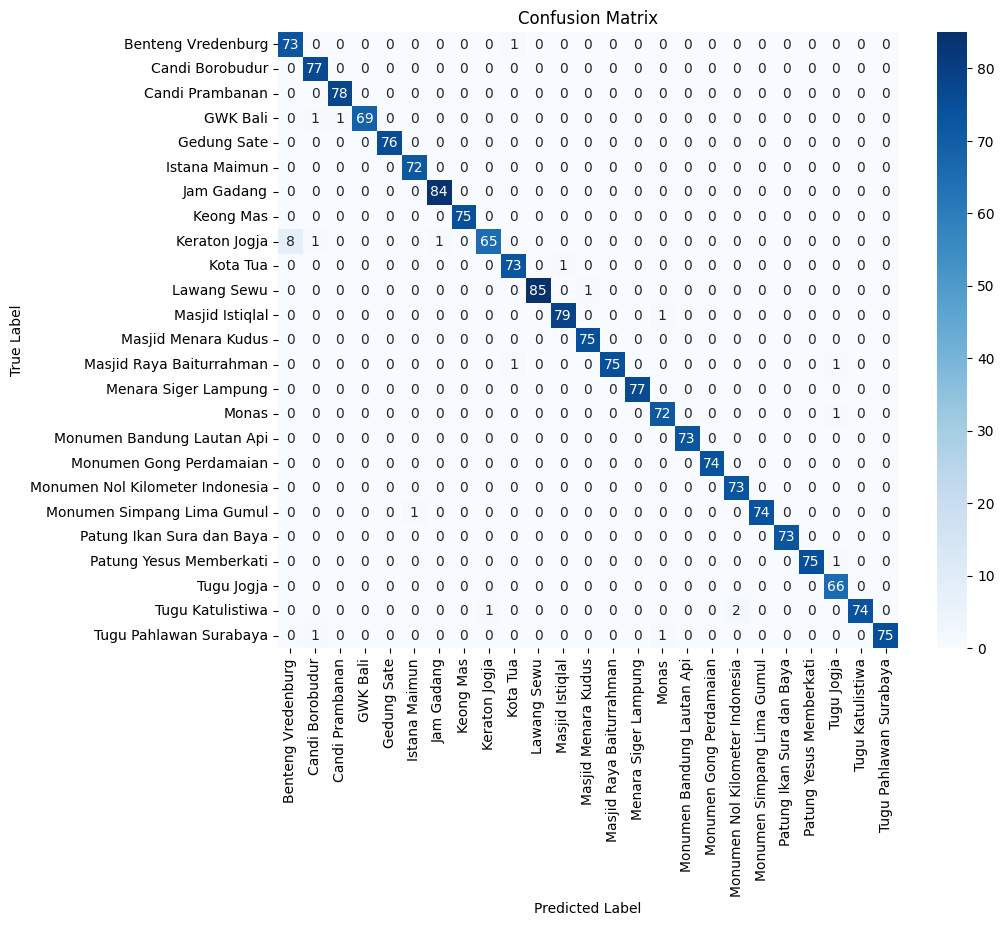

In [25]:
plot_cm(y_true, y_pred)

# Model Xception

In [26]:
loaded_m = tf.keras.models.load_model("./history/modelv1-ft-90.h5")
loaded_m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

In [27]:
y_true = []
y_pred = []
c = 0
for img, label in data:
    # print(len(img))
    for i in range(1):
    # y_true.append(x)
        # plt.imshow(images[i].numpy().astype("uint8"))
        # plt.subplot(2,3, i+1)
        # plt.imshow(img[i].numpy().astype("uint8"))
        # plt.title(classes[label[i]])
        y_p = classes[np.argmax(loaded_m.predict(img))]
        y_pred.append(y_p)
        
        y_t = classes[label[i]]
        y_true.append(y_t)
        
        print(f"{y_t}\nPred: {y_p}")
        c+=1

1/1 [==============================] - 2s 2s/step
Monumen Bandung Lautan Api
Pred: Monumen Bandung Lautan Api
1/1 [==============================] - 0s 35ms/step
Candi Prambanan
Pred: Candi Prambanan
1/1 [==============================] - 0s 33ms/step
Patung Yesus Memberkati
Pred: Patung Yesus Memberkati
1/1 [==============================] - 0s 32ms/step
Tugu Pahlawan Surabaya
Pred: Tugu Pahlawan Surabaya
1/1 [==============================] - 0s 33ms/step
Monumen Bandung Lautan Api
Pred: Monumen Bandung Lautan Api
1/1 [==============================] - 0s 35ms/step
Monumen Simpang Lima Gumul
Pred: Monumen Simpang Lima Gumul
1/1 [==============================] - 0s 31ms/step
Monumen Gong Perdamaian
Pred: Monumen Gong Perdamaian
1/1 [==============================] - 0s 28ms/step
Masjid Raya Baiturrahman
Pred: Masjid Raya Baiturrahman
1/1 [==============================] - 0s 33ms/step
Candi Prambanan
Pred: Candi Prambanan
1/1 [==============================] - 0s 29ms/step
Keong Mas


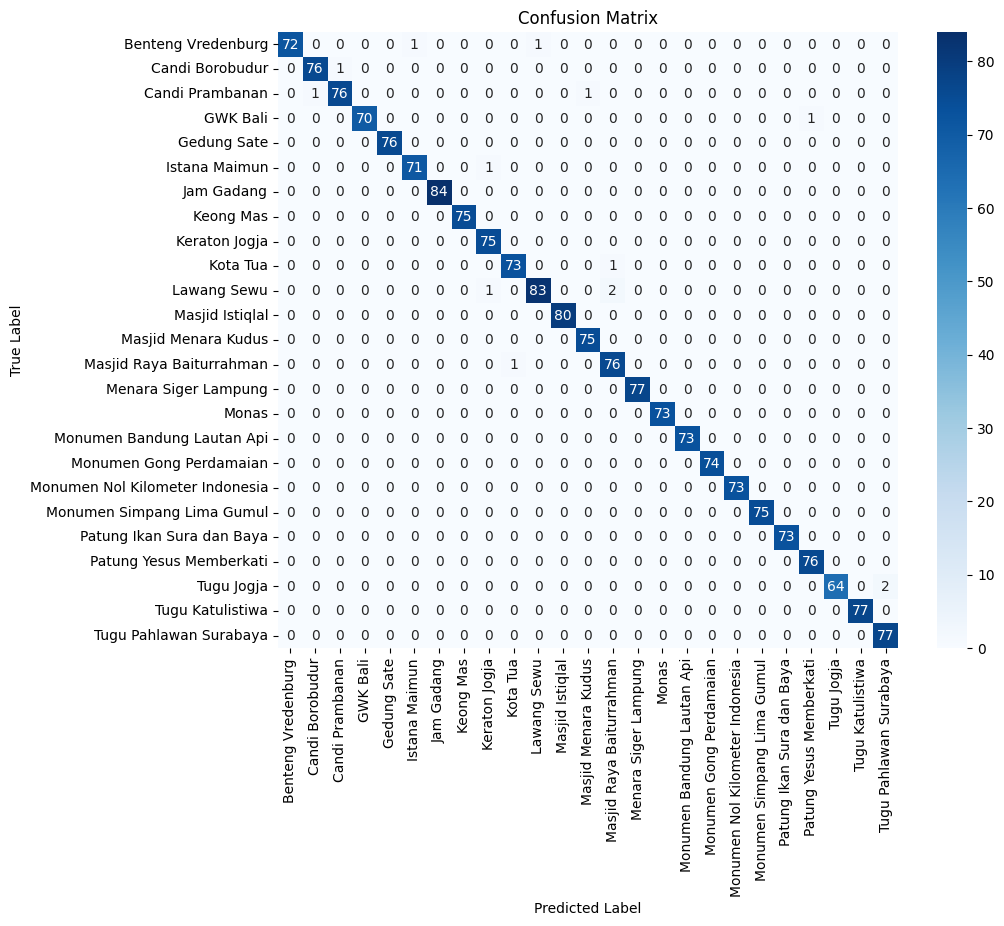

In [28]:
plot_cm(y_true, y_pred)

# Model DenseNet121

In [4]:
loaded_m = tf.keras.models.load_model("./history/model_DenseNet121_v2.h5")
loaded_m.summary()

Model: "model_4_DenseNet121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 average_pooling2d_2 (Avera  (None, 3, 3, 1024)        0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dropout_2 (Dropout)         (None, 9216)              0         
                                               

In [5]:
y_true = []
y_pred = []
c = 0
for img, label in data:
    # print(len(img))
    for i in range(1):
    # y_true.append(x)
        # plt.imshow(images[i].numpy().astype("uint8"))
        # plt.subplot(2,3, i+1)
        # plt.imshow(img[i].numpy().astype("uint8"))
        # plt.title(classes[label[i]])
        y_p = classes[np.argmax(loaded_m.predict(img))]
        y_pred.append(y_p)
        
        y_t = classes[label[i]]
        y_true.append(y_t)
        
        print(f"{y_t}\nPred: {y_p}")
        c+=1

2024-06-20 16:57:31.678804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8700
2024-06-20 16:57:32.301199: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 12s 12s/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 36ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 34ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 36ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 43ms/step
Benteng Vredenburg
Pred: Keraton Jogja
1/1 [==============================] - 0s 33ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 34ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 36ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 2s 2s/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 42ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 46ms/

2024-06-20 16:57:53.914956: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40446018 exceeds 10% of free system memory.


1/1 [==============================] - 2s 2s/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 47ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 58ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 56ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg


2024-06-20 16:57:55.557466: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72000000 exceeds 10% of free system memory.
2024-06-20 16:57:55.696990: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 56317866 exceeds 10% of free system memory.
2024-06-20 16:57:55.729237: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27320832 exceeds 10% of free system memory.


1/1 [==============================] - 0s 93ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 54ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 48ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 51ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg


2024-06-20 16:57:56.095036: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28399413 exceeds 10% of free system memory.


1/1 [==============================] - 2s 2s/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 45ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 48ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 50ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 63ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 42ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 54ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 42ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 49ms/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 2s 2s/step
Benteng Vredenburg
Pred: Benteng Vredenburg
1/1 [==============================] - 0s 53

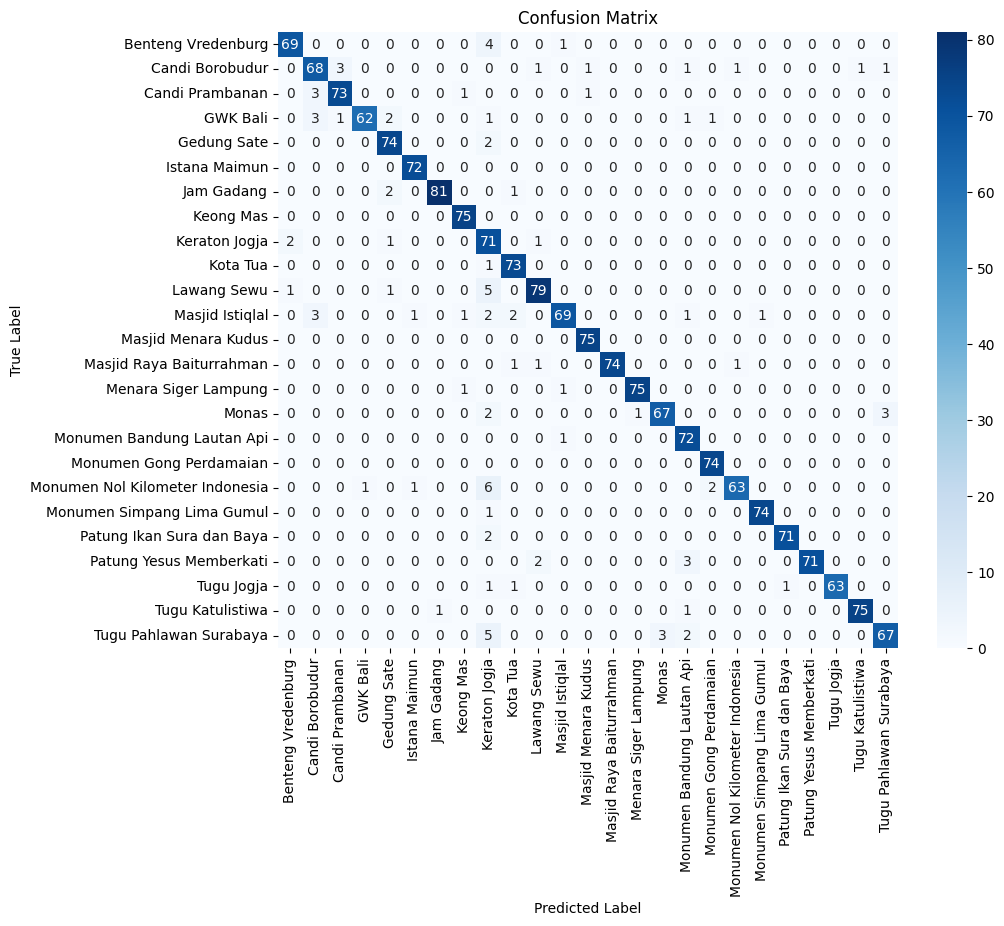

In [6]:
plot_cm(y_true, y_pred)